# Using Convolutional Neural Networks

In [46]:
%matplotlib inline

In [47]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [48]:
import utils; reload(utils)
from utils import plots

## Use VGG16

In [49]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [50]:
vgg = Vgg16()

In [40]:
path = "data/dogscats/sample/"

In [41]:
batches = vgg.get_batches(path+'train', batch_size=4)

Found 16 images belonging to 2 classes.


In [50]:
batches

In [26]:
imgs,labels = next(batches)

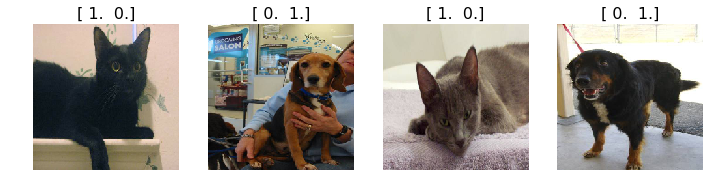

In [9]:
plots(imgs, titles=labels)

In [16]:
??vgg.predict

In [17]:
preds = vgg.predict(imgs, details=True)

In [51]:
preds

(array([ 0.3379,  0.3414,  0.5375,  0.7147], dtype=float32),
 array([285, 237, 285, 244]),
 [u'Egyptian_cat', u'miniature_pinscher', u'Egyptian_cat', u'Tibetan_mastiff'])

In [52]:
preds[0].size

4

#### Kaggle Format

In [33]:
print("id,label")
for i in xrange(4):
    print(str(i) + "," + str(preds[0][i]))

id,label
0,0.337922
1,0.341397
2,0.537485
3,0.714664


In [11]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

## Fine Tune for dogs and cats

In [19]:
batch_size=64

In [52]:
path = "data/dogscats/"

In [53]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


nb_class seems to have been renamed to num_class and nb_sample to samples, so when runningVgg16.fit, they need to aliased (or probably better to just modify vg16.py directly):

In [54]:
batches.nb_class = batches.num_class
batches.nb_sample = batches.samples
val_batches.nb_class = batches.num_class
val_batches.nb_sample = val_batches.samples

In [32]:
vgg.finetune(batches)

#### Need GPU to fit in reasonable time

1. 25 hours free
https://www.crestle.com/dashboard
2. 100 hours free
https://github.com/YuelongGuo/floydhub.fast.ai/blob/master/README.md

In [ ]:
#run these on GPU
#vgg.fit(batches, val_batches, nb_epoch=1)
#vgg.model.save_weights("vgg_dogs_cats_weights")

In [23]:
vgg.model.load_weights("vgg_dogs_cats_weights")

In [17]:
test_path = "data/dogscats/test"

Need to put test images under data/dogscats/test/unknown

In [20]:
test_batches = vgg.get_batches(test_path, shuffle=False, batch_size=batch_size*2, class_mode=None)

Found 12500 images belonging to 1 classes.


In [26]:
test_batches.nb_class = test_batches.num_class
test_batches.nb_sample = test_batches.samples

In [ ]:
#import datetime
#print(datetime.datetime.now())
#preds = vgg.model.predict_generator(test_batches, test_batches.nb_sample)
#print(datetime.datetime.now())

2017-08-14 08:51:38.319379


In [ ]:
#np.save("preds.numpy", preds)
#np.save("files.numpy", test_batches.filenames)

In [34]:
preds = np.load("preds.numpy.npy")
filenames = np.load("files.numpy.npy")

In [36]:
print(filenames[12499])
print(preds[12499])

unknown/736.jpg
[  7.0229e-06   9.9999e-01]


In [37]:
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [45]:
out = open('./submit_5_95.csv', 'w+')
out.write("id,label\n")
for i in xrange(12500):    
    score = preds[i][1]
    if (score < 0.05):
        score = 0.05
    if (score > 0.95):
        score = 0.95
    out.write(str(ids[i]) + "," + str(score) + "\n")

out.close()